# Expedition to Data Science and Machine Learning
## Module 4: Machine Learning with Python
### Lecture 4: Supervised Learning - Classification: Logistic Regression

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Supervised Learning - Classification: Logistic Regression

#### References:
[1] Machine Learning Fundamentals: The Confusion Matrix - https://www.youtube.com/watch?v=Kdsp6soqA7o&ab_channel=StatQuestwithJoshStarmer
<br>[2] Machine Learning Fundamentals: Sensitivity and Specificity: https://www.youtube.com/watch?v=sunUKFXMHGk&ab_channel=StatQuestwithJoshStarmer
<br>[3] ROC and AUC, Clearly Explained! https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer
<br>[4] Machine Learning Fundamentals: Bias and Variance: https://www.youtube.com/watch?v=EuBBz3bI-aA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=5&ab_channel=StatQuestwithJoshStarmer
<br>[5] StatQuest: Logistic Regression - https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer
<br>[6] Logistic Regression Details Pt1: Coefficients: https://www.youtube.com/watch?v=vN5cNN2-HWE&ab_channel=StatQuestwithJoshStarmer
<br>[7] Logistic Regression Details Pt 2: Maximum Likelihood: https://www.youtube.com/watch?v=BfKanl1aSG0&t=163s&ab_channel=StatQuestwithJoshStarmer
<br>[8] Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification): https://www.youtube.com/watch?v=zM4VZR0px8E&ab_channel=codebasics
<br>[9] Maximum Likelihood, clearly explained!!!: https://www.youtube.com/watch?v=XepXtl9YKwc&ab_channel=StatQuestwithJoshStarmer

#### Import required libraries

In [123]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#### Load data
Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [124]:
df = pd.read_csv("Churn.csv")

pd.options.display.max_columns = df.shape[1]

display(df.sample(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
1648,102,0,174.5,236.8,270.4,8.5,0,no,no,no,79,29.67,136,20.13,110,12.17,5,2.30,VA,510,398-5788
2706,125,0,206.0,198.1,135.9,13.2,0,no,no,no,128,35.02,71,16.84,116,6.12,3,3.56,WV,415,381-7597
3198,53,32,131.2,227.4,178.9,12.8,2,no,no,yes,63,22.30,125,19.33,105,8.05,2,3.46,DE,415,416-9723
306,113,0,272.1,268.5,213.8,8.5,1,yes,no,no,111,46.26,118,22.82,105,9.62,10,2.30,VT,415,419-1714
2227,41,0,237.8,223.5,217.4,10.2,2,no,no,no,92,40.43,155,19.00,90,9.78,6,2.75,SC,408,417-6906
2749,95,0,229.9,202.4,171.4,14.2,1,no,no,no,116,39.08,110,17.20,105,7.71,6,3.83,AL,415,350-7273
2970,90,22,124.5,231.7,222.2,6.4,1,no,no,yes,94,21.17,90,19.69,108,10.00,12,1.73,ND,415,329-8638
2427,83,0,159.3,202.3,229.0,9.5,2,no,no,no,104,27.08,98,17.20,73,10.31,3,2.57,ID,415,350-4297
615,48,43,172.0,200.2,233.1,8.0,1,no,no,yes,111,29.24,64,17.02,96,10.49,5,2.16,UT,510,340-3075
2414,16,0,110.0,147.3,190.5,6.4,0,no,yes,no,91,18.70,75,12.52,73,8.57,7,1.73,IL,415,342-2013


(3333, 21)


In [125]:
df = df.drop(["Area_Code", "Phone", "State"], axis=1)

print(df.shape)

(3333, 18)


In [126]:
# abul = sorted(df["State"].unique())
# print(abul)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Data Preprocessing

In [128]:
df["Churn"].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [129]:
df["Intl_Plan"].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [130]:
df["Vmail_Plan"].value_counts()

no     2411
yes     922
Name: Vmail_Plan, dtype: int64

In [131]:
df["Churn"] = df["Churn"].replace({"no":0, "yes": 1})
df["Intl_Plan"] = df["Intl_Plan"].replace({"no":0, "yes": 1})
df["Vmail_Plan"] = df["Vmail_Plan"].replace({"no":0, "yes": 1})

display(df.head(10))
df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Target variable visualization

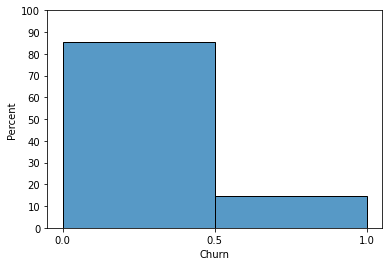

In [132]:
sns.histplot(x="Churn", data=df, binwidth=0.5, stat="percent")
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(0,1.1,0.5))
plt.show()

#### Feature and target variable separation

In [133]:
X = df.drop("Churn", axis=1)
y = df[["Churn"]]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Train test separation

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


In [135]:
y_train["Churn"].value_counts(normalize=True)*100

0    85.52138
1    14.47862
Name: Churn, dtype: float64

In [136]:
y_test["Churn"].value_counts(normalize=True)*100

0    85.457271
1    14.542729
Name: Churn, dtype: float64

#### Training: Logistic Regression